In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.optimize import fsolve
from scipy.integrate import quad

In [6]:
# The parameters of the two distributions
mu1, sigma1 = 0, 0.5 
mu2, sigma2 = 1, 1  

# The two normal distributions
dist1 = norm(mu1, sigma1)
dist2 = norm(mu2, sigma2)

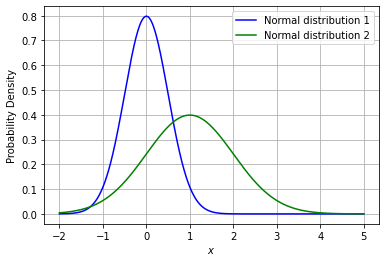

In [7]:
# Generate points for the x axis 
x = np.linspace(mu1 - 4 * sigma1, mu2 + 4 * sigma2, 1000)

# Plot the PDFs
plt.plot(x, dist1.pdf(x), label='Normal distribution 1', color='blue')
plt.plot(x, dist2.pdf(x), label='Normal distribution 2', color='green')

plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()

In [8]:
# Find the intersection point
def find_intersection(x):
    return dist1.pdf(x) - dist2.pdf(x)

intersection_point = fsolve(find_intersection, 0.5)  # Initial guess
print(f'Intersection point: {intersection_point[0]:.3f}')

Intersection point: 0.619


In [9]:
# Caclulate the Bayes error rate
bayes_error_1 = quad(dist1.pdf, -np.inf, intersection_point)[0]  # Area under dist1 up to the intersection
bayes_error_2 = quad(dist2.pdf, intersection_point, np.inf)[0]   # Area under dist2 from the intersection to infinity

bayes_error_total = bayes_error_1 + bayes_error_2
print(f'Bayes error: {bayes_error_total:.3f}')

Bayes error: 1.541
